# **EVALUACIÓN FINAL: ANÁLISIS DE PREFERENCIAS MUSICALES A NIVEL GLOBAL**
Trabajas en un centro de investigación de tendencias culturales y te han encargado un análisis sobre las preferencias musicales en distintos países. Tu tarea es aplicar técnicas de aprendizaje de máquina no supervisado para extraer patrones de escucha y agrupar países según sus similitudes en consumo musical.

**OBJETIVOS DE LA EVALUACIÓN**

• Aplicar clusterización para encontrar grupos de países con patrones de escucha similares.

• Utilizar reducción de dimensionalidad para visualizar la estructura de los datos.

• Evaluar diferentes algoritmos y justificar sus ventajas y desventajas.

• Interpretar los resultados en un contexto cultural y social.

**INSTRUCCIONES**
1. Carga y exploración de datos (1 punto)

    • Carga el dataset proporcionado, que contiene información sobre la popularidad de distintos géneros musicales en países como Chile, EE.UU., México, Corea, Japón, Alemania, Rusia e Italia.

    • Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

2. Aplicación de algoritmos de clusterización (5 puntos)

    **K-Means:**

    • Aplica el algoritmo K-Means con un valor inicial de K=3.
    
    • Determina el valor óptimo de K utilizando el método del codo y el coeficiente de silueta.
    
    **Clustering jerárquico:**
    
    • Genera un dendrograma y determina el número óptimo de clusters.
    
    • Aplica clustering jerárquico y compara con los resultados de K-Means.


    **DBSCAN:**

    • Aplica DBSCAN con diferentes valores de eps y MinPts.

    • Justifica la elección de los parámetros y analiza si DBSCAN identifica agrupaciones significativas.

3. Aplicación de reducción de dimensionalidad (3 puntos)   
  **PCA:**

    • Aplica PCA y determina cuántos componentes principales explican al menos el 90% de la varianza.

    • Visualiza los países en un gráfico bidimensional con las primeras dos componentes principales.
    
    **t-SNE:**
    
    • Aplica t-SNE para visualizar la relación entre los países en un espacio de 2D.
    • Experimenta con diferentes valores de perplexity y analiza cómo afectan la representación.

4. Análisis de resultados y conclusiones (1 punto)

   **Comparación de métodos:**
   
   • Explica las diferencias entre K-Means, clustering jerárquico y DBSCAN. ¿Cuál funcionó mejor en este caso y por qué?

   • Compara los resultados obtenidos con PCA y t-SNE. ¿Cuál técnica permitió visualizar mejor la relación entre los países?

**Interpretación:**

• ¿Los clusters obtenidos reflejan similitudes culturales o geográficas en la música?

• Relaciona los resultados con tendencias globales en consumo musical.

In [ ]:
import csv
from google.colab import files
import pandas as pd


In [ ]:
# ==============================
# 1. CARGA DE LOS DATOS
# ==============================

files.upload()
archivo_csv = 'dataset_generos_musicales.csv'

#leer archivo .csv
with open(archivo_csv, 'r', encoding='utf-8') as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)

df = pd.read_csv(archivo_csv, sep=dialect.delimiter)

df

Saving dataset_generos_musicales.csv to dataset_generos_musicales.csv


,País,Pop,Rock,Hip-Hop,Electrónica,Clásica,Jazz,Reguetón,Metal
0,Chile,71,22,79,61,70,58,79,69
1,EEUU,34,41,40,79,74,37,90,23
2,México,91,72,52,99,83,23,63,21
3,Corea,80,21,95,34,22,79,27,25
4,Japón,40,49,77,81,70,33,66,73
5,Alemania,94,57,41,81,26,28,54,23
6,Rusia,94,21,68,66,40,72,97,73
7,Italia,43,83,78,81,92,21,55,82


     País  Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   Chile   71    22       79           61       70    58        79     69
1    EEUU   34    41       40           79       74    37        90     23
2  México   91    72       52           99       83    23        63     21
3   Corea   80    21       95           34       22    79        27     25
4   Japón   40    49       77           81       70    33        66     73
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   País         8 non-null      object
 1   Pop          8 non-null      int64 
 2   Rock         8 non-null      int64 
 3   Hip-Hop      8 non-null      int64 
 4   Electrónica  8 non-null      int64 
 5   Clásica      8 non-null      int64 
 6   Jazz         8 non-null      int64 
 7   Reguetón     8 non-null      int64 
 8   Metal        8 non-null      int64 

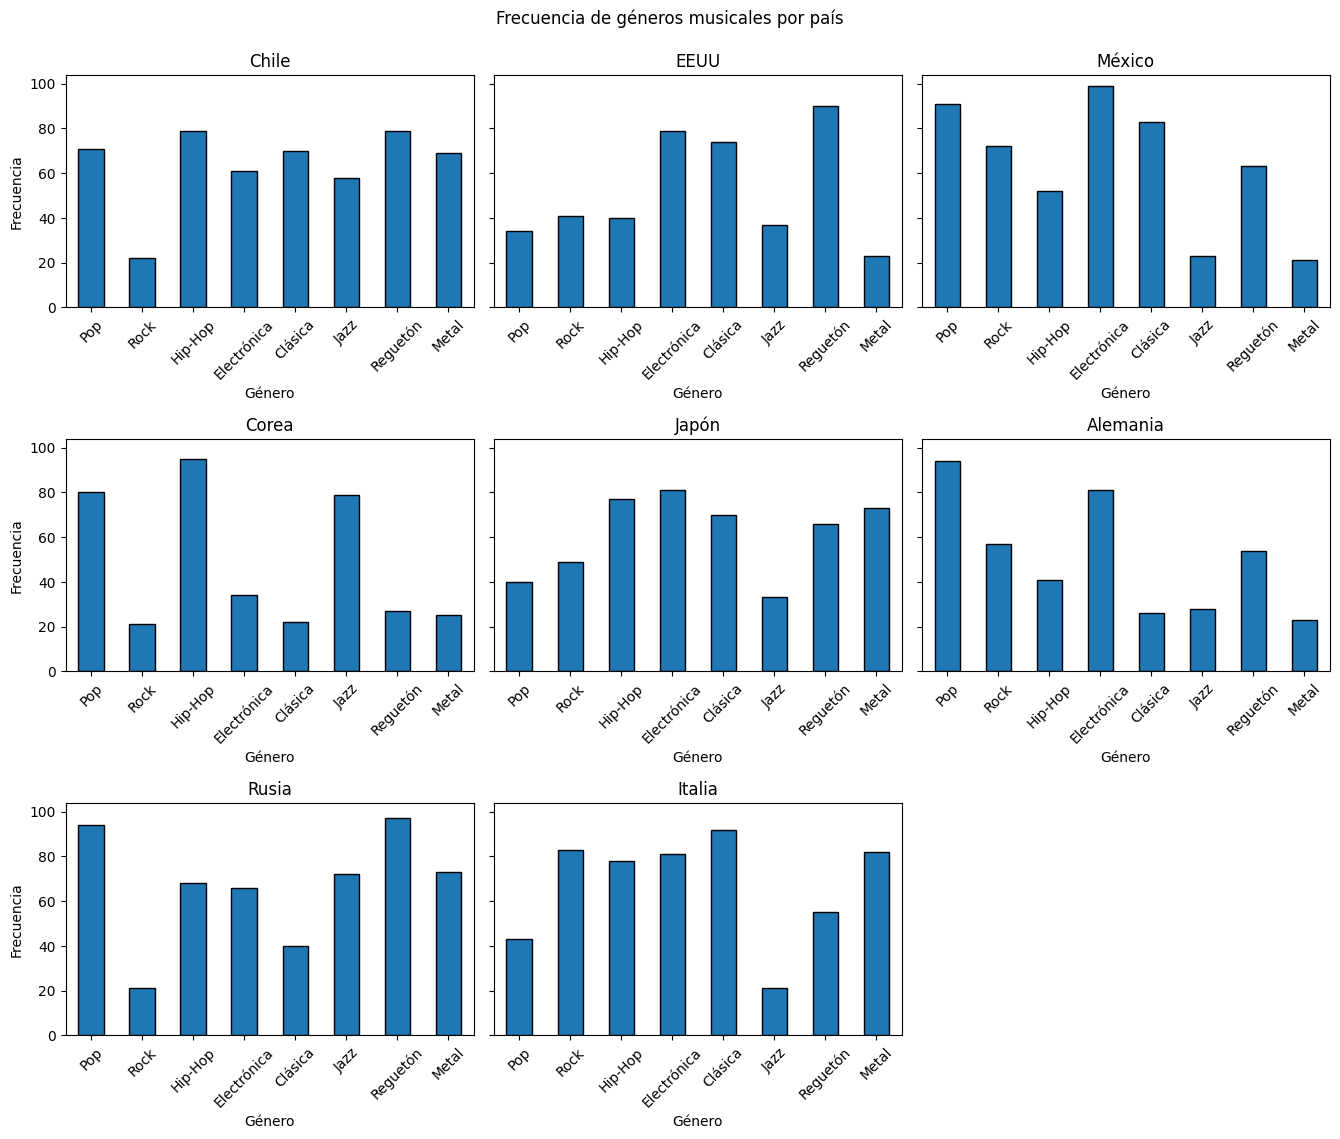

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# • Analiza las características del dataset, identificando distribuciones y tendencias iniciales.

# ==============================
# 1.1 VISUALIZACION DE LOS DATOS
# ==============================

# Exploración básica
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe())
print("\n")


# nombres de columnas de df distintas a "País"
generos = df.columns[1:]
# Distribución de variables numéricas
paises = df["País"].tolist()

n = len(paises)
n_cols = 3
n_rows = math.ceil(n / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4.5*n_cols, 3.8*n_rows), sharey=True)
axes = axes.ravel() if n > 1 else [axes]

for i, row in df.iterrows():
    ax = axes[i]
    row[generos].plot(kind="bar", ax=ax, edgecolor="black")
    ax.set_title(row["País"])
    ax.set_xlabel("Género")
    ax.set_ylabel("Frecuencia" if i % n_cols == 0 else "")
    ax.tick_params(axis="x", rotation=45)

# Ocultar subplots vacíos
for j in range(i+1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Frecuencia de géneros musicales por país", y=0.995)
fig.tight_layout()
plt.show()
print("\n")





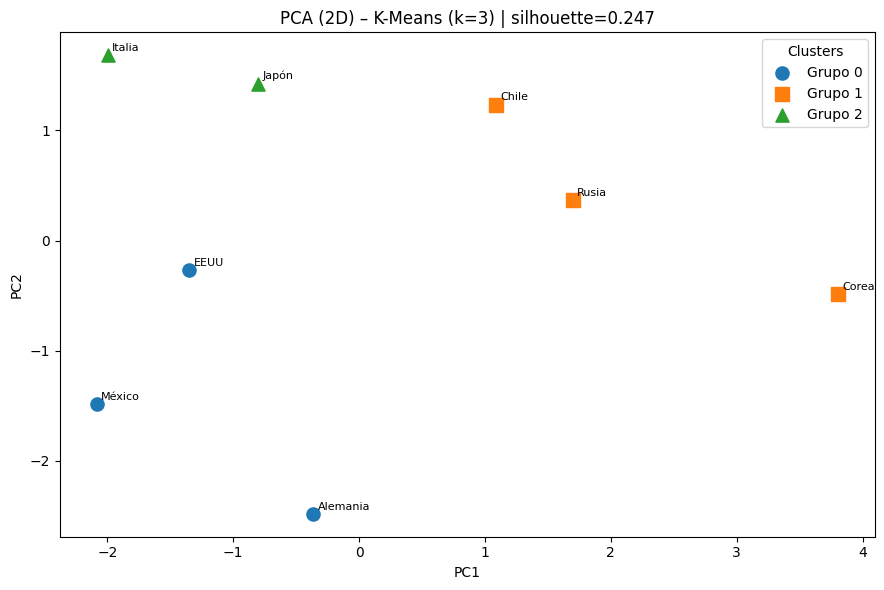

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score



X = df[generos].values

# =========================
# Escalado + K-Means(k=3)
# =========================
datos_normalizados = StandardScaler().fit_transform(X)
k = 3
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(datos_normalizados)
sil = silhouette_score(datos_normalizados, labels) if len(set(labels)) > 1 else np.nan

# =========================
# PCA para visualizar
# =========================
datos_pca = PCA(n_components=2, random_state=42).fit_transform(datos_normalizados)

# =========================
# Scatter con legend por grupo
# =========================
plt.figure(figsize=(9, 6))

# marcadores para diferenciar grupos visualmente
markers = ['o', 's', '^', 'D', 'P', 'X']

for g in sorted(np.unique(labels)):
    idx = labels == g
    plt.scatter(datos_pca[idx, 0], datos_pca[idx, 1], s=90, marker=markers[g % len(markers)], label=f"Grupo {g}")
    # etiquetas de país para cada punto del grupo
    for i in np.where(idx)[0]:
        plt.annotate(paises[i], (datos_pca[i, 0], datos_pca[i, 1]),
                     xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.title(f"PCA (2D) – K-Means (k=3) | silhouette={sil:.3f}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clusters", loc="best", frameon=True)
plt.tight_layout()
plt.show()



In [ ]:
print(df[generos])

   Pop  Rock  Hip-Hop  Electrónica  Clásica  Jazz  Reguetón  Metal
0   71    22       79           61       70    58        79     69
1   34    41       40           79       74    37        90     23
2   91    72       52           99       83    23        63     21
3   80    21       95           34       22    79        27     25
4   40    49       77           81       70    33        66     73
5   94    57       41           81       26    28        54     23
6   94    21       68           66       40    72        97     73
7   43    83       78           81       92    21        55     82


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

def k_distance_curve(X, k):
    Xs = StandardScaler().fit_transform(X)
    nn = NearestNeighbors(n_neighbors=k)
    nn.fit(Xs)
    distances, _ = nn.kneighbors(Xs)
    kth_distances = np.sort(distances[:, -1])
    return kth_distances

def elbow_kneedle(y):
    n = len(y)
    if n < 3:
        return n - 1, y[-1]
    import numpy as np
    p1 = np.array([0, y[0]], dtype=float)
    p2 = np.array([n - 1, y[-1]], dtype=float)
    line_vec = p2 - p1
    line_len = np.linalg.norm(line_vec)
    if line_len == 0:
        return n - 1, y[-1]
    xs = np.arange(n, dtype=float)
    pts = np.vstack([xs, y]).T
    diffs = pts - p1
    cross = np.abs(diffs[:, 0] * line_vec[1] - diffs[:, 1] * line_vec[0])
    dists = cross / line_len
    idx = int(np.argmax(dists))
    return idx, float(y[idx])

def suggest_eps(X, min_samples):
    kd = k_distance_curve(X, k=min_samples)
    idx, eps = elbow_kneedle(kd)
    return eps, kd, idx

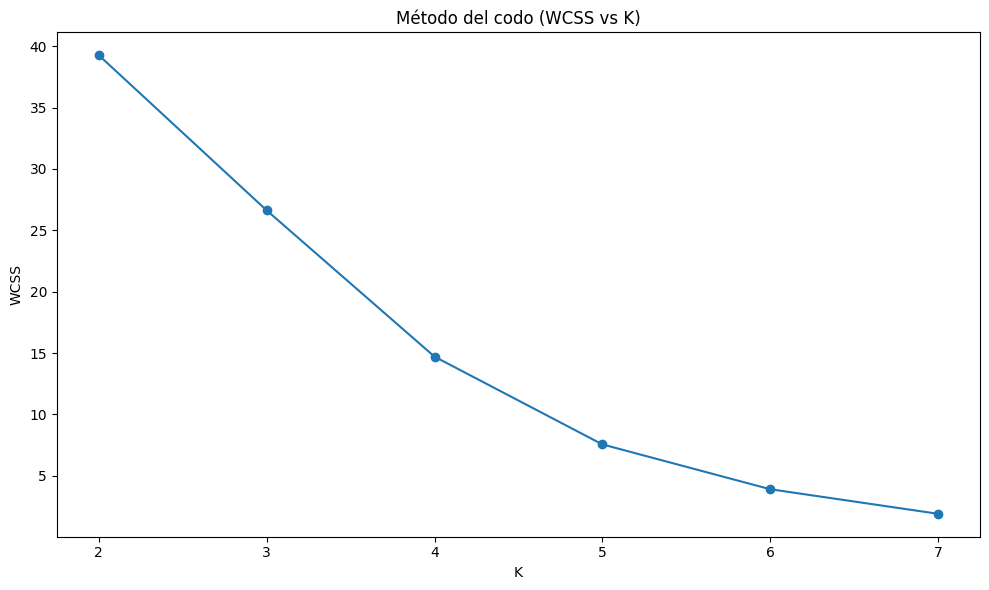

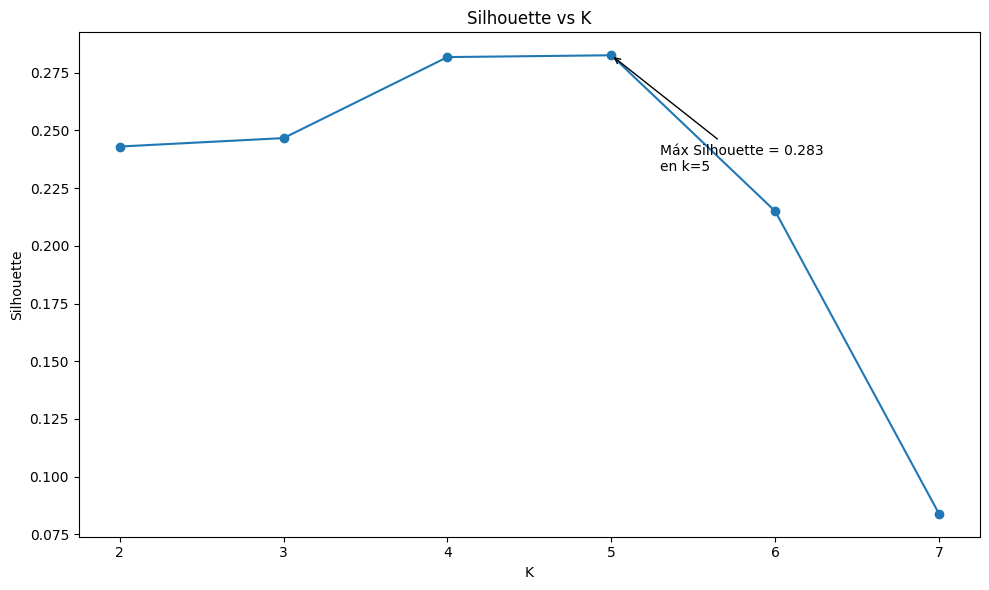

Mejor K (silhouette): 5  |  Silhouette=0.283


In [ ]:
# =========================
# 3) Barrido de K y métricas
# =========================
n = X.shape[0]
k_min, k_max = 2, max(2, min(8, n-1))   # K de 2 a 8 (o hasta n-1)
k_range = list(range(k_min, k_max + 1))
#inertias, silhouettes = [], []
wcss, siluetas = [], []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(datos_normalizados)
    wcss.append(kmeans.inertia_)
    siluetas.append(silhouette_score(datos_normalizados, labels, metric='euclidean') if len(set(labels)) > 1 else np.nan)


# =========================
# Codo
# =========================


# Codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker="o")
plt.title("Método del codo (WCSS vs K)")
plt.xlabel("K"); plt.ylabel("WCSS")
plt.xticks(k_range)
plt.tight_layout()
plt.show()


# =========================
# Silhouette
# =========================
k_sil = k_range[int(np.nanargmax(siluetas))]

sil_opt = np.nanmax(siluetas)

plt.figure(figsize=(10, 6))
plt.plot(k_range, siluetas, marker="o")
plt.title("Silhouette vs K")
plt.annotate(f'Máx Silhouette = {sil_opt:.3f}\nen k={int(k_sil)}',
             xy=(k_sil, sil_opt),
             xytext=(k_sil+0.3, sil_opt-0.05),
             arrowprops=dict(arrowstyle='->'))
plt.xlabel("K"); plt.ylabel("Silhouette")
plt.xticks(k_range)
plt.tight_layout()
plt.show()


print(f"Mejor K (silhouette): {k_sil}  |  Silhouette={np.nanmax(siluetas):.3f}")




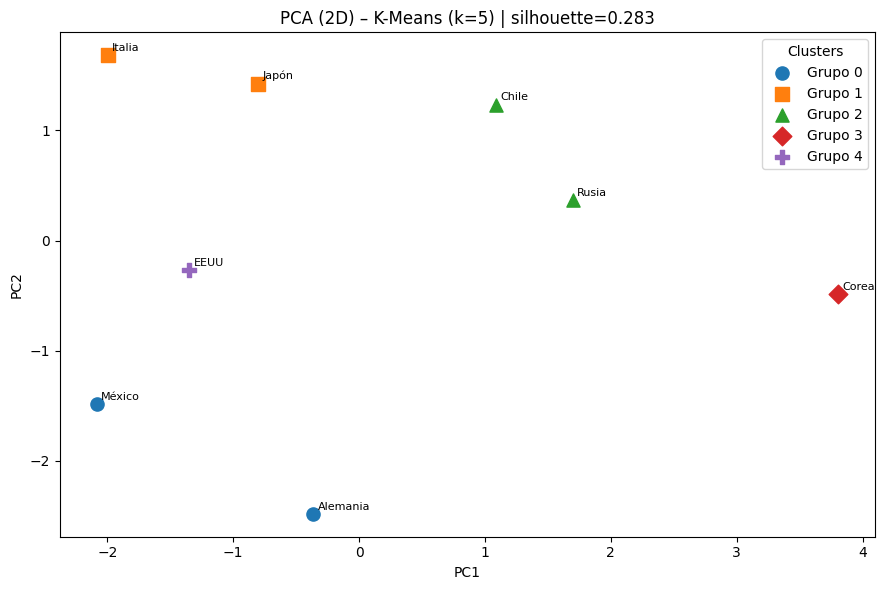

Varianza explicada por la primera componente:  46.03%
Varianza explicada por la segunda componente:  23.72%
Varianza explicada acumulada (2 componentes): 69.75%
Nº de componentes para ≥90% varianza: 3


In [ ]:
k = k_sil
km = KMeans(n_clusters=k, n_init=50, random_state=42)
labels = km.fit_predict(datos_normalizados)
sil = silhouette_score(datos_normalizados, labels) if len(set(labels)) > 1 else np.nan

# =========================
# PCA para visualizar
# =========================
pca = PCA(n_components=2, random_state=42)
datos_pca = pca.fit_transform(datos_normalizados)

# =========================
# Scatter con legend por grupo
# =========================
plt.figure(figsize=(9, 6))

# marcadores para diferenciar grupos visualmente
markers = ['o', 's', '^', 'D', 'P', 'X']

for g in sorted(np.unique(labels)):
    idx = labels == g
    plt.scatter(datos_pca[idx, 0], datos_pca[idx, 1], s=90, marker=markers[g % len(markers)], label=f"Grupo {g}")
    # etiquetas de país para cada punto del grupo
    for i in np.where(idx)[0]:
        plt.annotate(paises[i], (datos_pca[i, 0], datos_pca[i, 1]),
                     xytext=(3, 3), textcoords="offset points", fontsize=8)

plt.title(f"PCA (2D) – K-Means (k={k}) | silhouette={sil:.3f}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Clusters", loc="best", frameon=True)
plt.tight_layout()
plt.show()

# 6) Evaluar la varianza explicada por cada componente
#    'explained_variance_ratio_' indica el % de varianza del total que captura cada CP.
explained_variance = pca.explained_variance_ratio_
print(f'Varianza explicada por la primera componente:  {explained_variance[0]:.2%}')
print(f'Varianza explicada por la segunda componente:  {explained_variance[1]:.2%}')
print(f'Varianza explicada acumulada (2 componentes): {(explained_variance[:2].sum()):.2%}')

from sklearn.decomposition import PCA
import numpy as np

# X: matriz de datos (n_muestras x n_features), ya estandarizada

cumvar = np.cumsum(explained_variance)
n90 = np.searchsorted(cumvar, 0.90) + 1  # +1 porque los índices empiezan en 0
print(f"Nº de componentes para ≥90% varianza: {n90}")


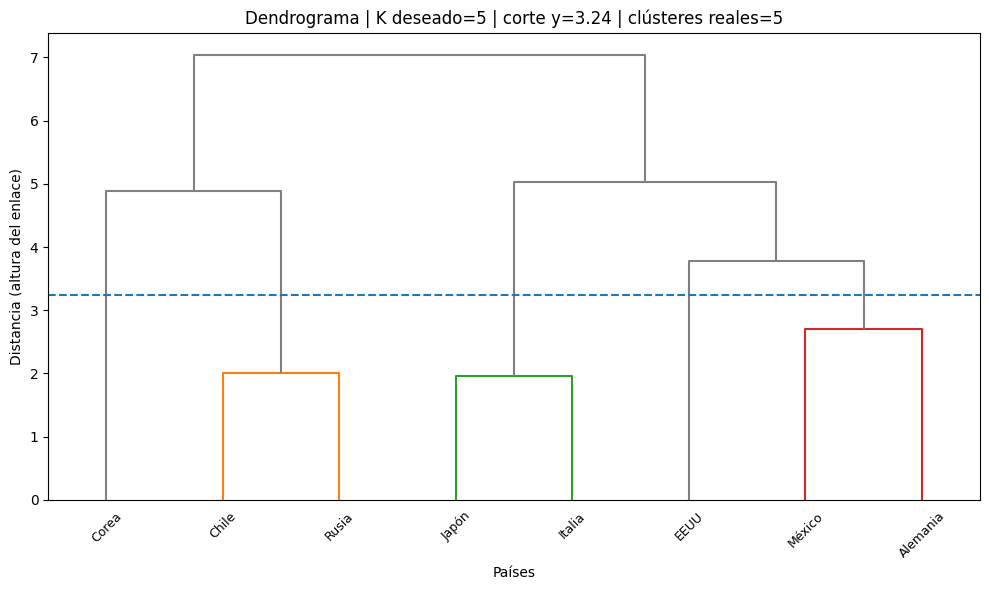

In [ ]:
# =========================
# Dendograma
# =========================
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
# =========================
# 4) Clustering jerárquico (Agglomerative) + dendrograma
# =========================
agg = AgglomerativeClustering(n_clusters=k_sil, linkage="ward")
agg_labels = agg.fit_predict(datos_normalizados)

# Para dendrograma se usa scipy.linkage con el mismo método
Z = linkage(datos_normalizados, method="ward")

# Graficar dendograma
# -----------------------------
# 4) Dendrograma (visual)
# -----------------------------
# Umbral de corte para k clusters: justo por encima de la fusión que deja k-1 clusters
#thr_ward = Z[-(k_sil-1), 2] + 1e-6
heights = Z[:, 2]
thr = 0.5 * (heights[-k_sil] + heights[-(k_sil-1)])  # umbral entre K y K-1

labels_k = fcluster(Z, t=k_sil, criterion='maxclust')  # verifica que hay K clústeres

plt.figure(figsize=(10, 6))
dendrogram(
    Z,
    labels=df['País'].values,
    leaf_rotation=45,
    leaf_font_size=9,
    color_threshold=thr,
    above_threshold_color="gray"
)
plt.ylabel('Distancia (altura del enlace)')
plt.xlabel('Países')
plt.title(f"Dendrograma | K deseado={k} | corte y={thr:.2f} | clústeres reales={k_sil}")
plt.axhline(y=thr, linestyle="--")  # línea horizontal indicando el corte
plt.tight_layout()
plt.show()





   Componente t-SNE 1  Componente t-SNE 2      País
0           79.612320         -191.906967     Chile
1           22.669775           21.865313      EEUU
2          -75.941536          134.449112    México
3           13.750607         -241.881149     Corea
4           95.831223          -18.237484     Japón
5         -127.201248          144.908127  Alemania
6          129.156525         -215.063629     Rusia
7          148.705154           -2.914601    Italia


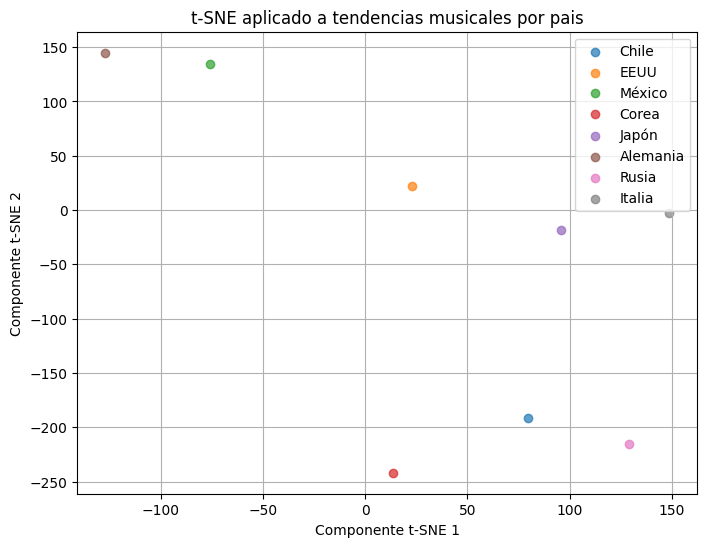

In [ ]:
from sklearn.manifold import TSNE


# 3. Convertir variables categóricas a numéricas
df_tnse = df.copy(deep=True)


#Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=2, random_state=42)
x_tsne = tsne.fit_transform(datos_normalizados)


# 6. Convertir los resultados en un DataFrame
df_tsne = pd.DataFrame(x_tsne, columns=['Componente t-SNE 1', 'Componente t-SNE 2'])
df_tsne['País'] = paises

print(df_tsne)

# 7. Graficar resultados
plt.figure(figsize=(8, 6))
for pais in paises:
    subset = df_tsne[df_tsne['País'] == pais]
    plt.scatter(subset['Componente t-SNE 1'], subset['Componente t-SNE 2'], label=pais, alpha=0.7)

plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.title('t-SNE aplicado a tendencias musicales por pais')
plt.legend()
plt.grid(True)
plt.show()
